<a href="https://colab.research.google.com/github/Rashimanish/Flight_App/blob/main/EDA/EDA_Part_One.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Read dataset
df = pd.read_csv('/content/cleaned_data_01_08.csv')

In [3]:
df.shape

(1802634, 22)

**Understanding the distribution of flight delay times,
which can highlight any skewness in the delay times and the presence of outliers**





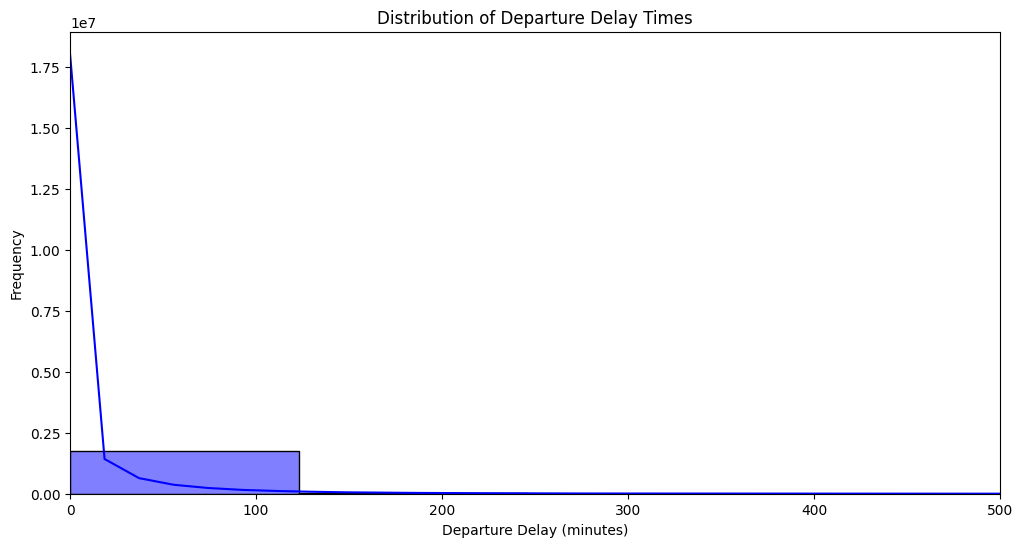

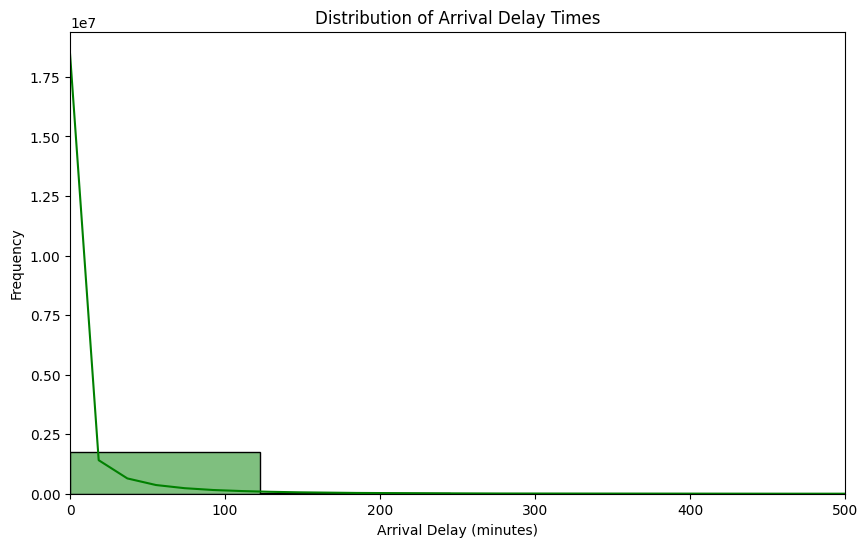

In [7]:
# Distribution of departure delay times
plt.figure(figsize=(12, 6))
sns.histplot(df['DEP_DELAY_NEW'].dropna(), kde=True, color='blue', bins=30)
plt.title('Distribution of Departure Delay Times')
plt.xlabel('Departure Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

# Distribution of arrival delay times
plt.figure(figsize=(10, 6))
sns.histplot(df['ARR_DELAY_NEW'].dropna(), kde=True, color='green', bins=30)
plt.title('Distribution of Arrival Delay Times')
plt.xlabel('Arrival Delay (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, 500)
plt.show()

**Help identify any imbalances or trends in the data**

<ipython-input-9-2840d16c464f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='ORIGIN', data=df, order=df['ORIGIN'].value_counts().index, palette='viridis')


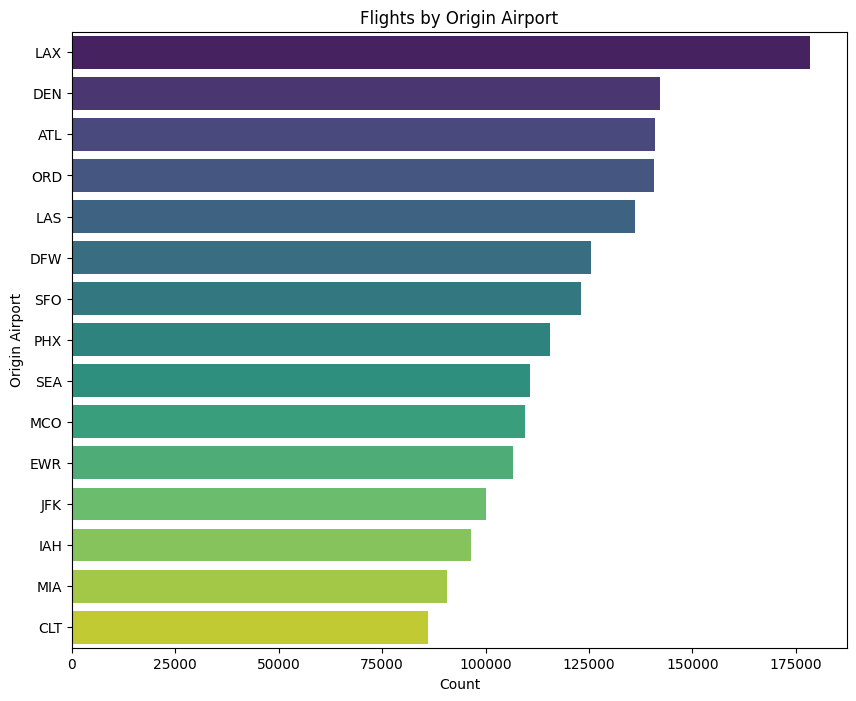

<ipython-input-9-2840d16c464f>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='DEST', data=df, order=df['DEST'].value_counts().index, palette='coolwarm')


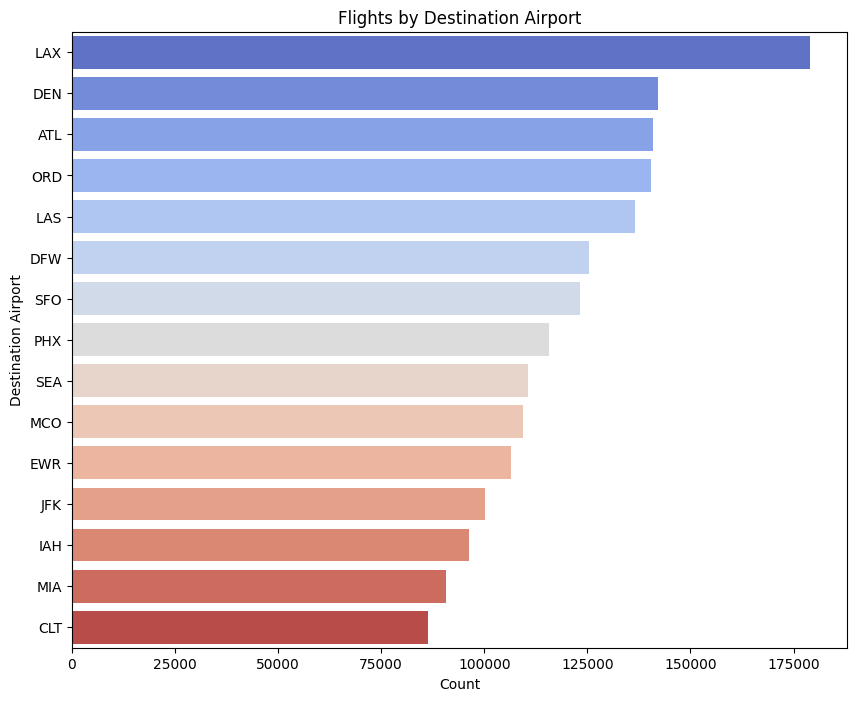

In [9]:
# Bar plot for origin airports
plt.figure(figsize=(10, 8))
sns.countplot(y='ORIGIN', data=df, order=df['ORIGIN'].value_counts().index, palette='viridis')
plt.title('Flights by Origin Airport')
plt.xlabel('Count')
plt.ylabel('Origin Airport')
plt.show()

# Bar plot for destination airports
plt.figure(figsize=(10, 8))
sns.countplot(y='DEST', data=df, order=df['DEST'].value_counts().index, palette='coolwarm')
plt.title('Flights by Destination Airport')
plt.xlabel('Count')
plt.ylabel('Destination Airport')
plt.show()


**Identify potential relationships between numerical variables**

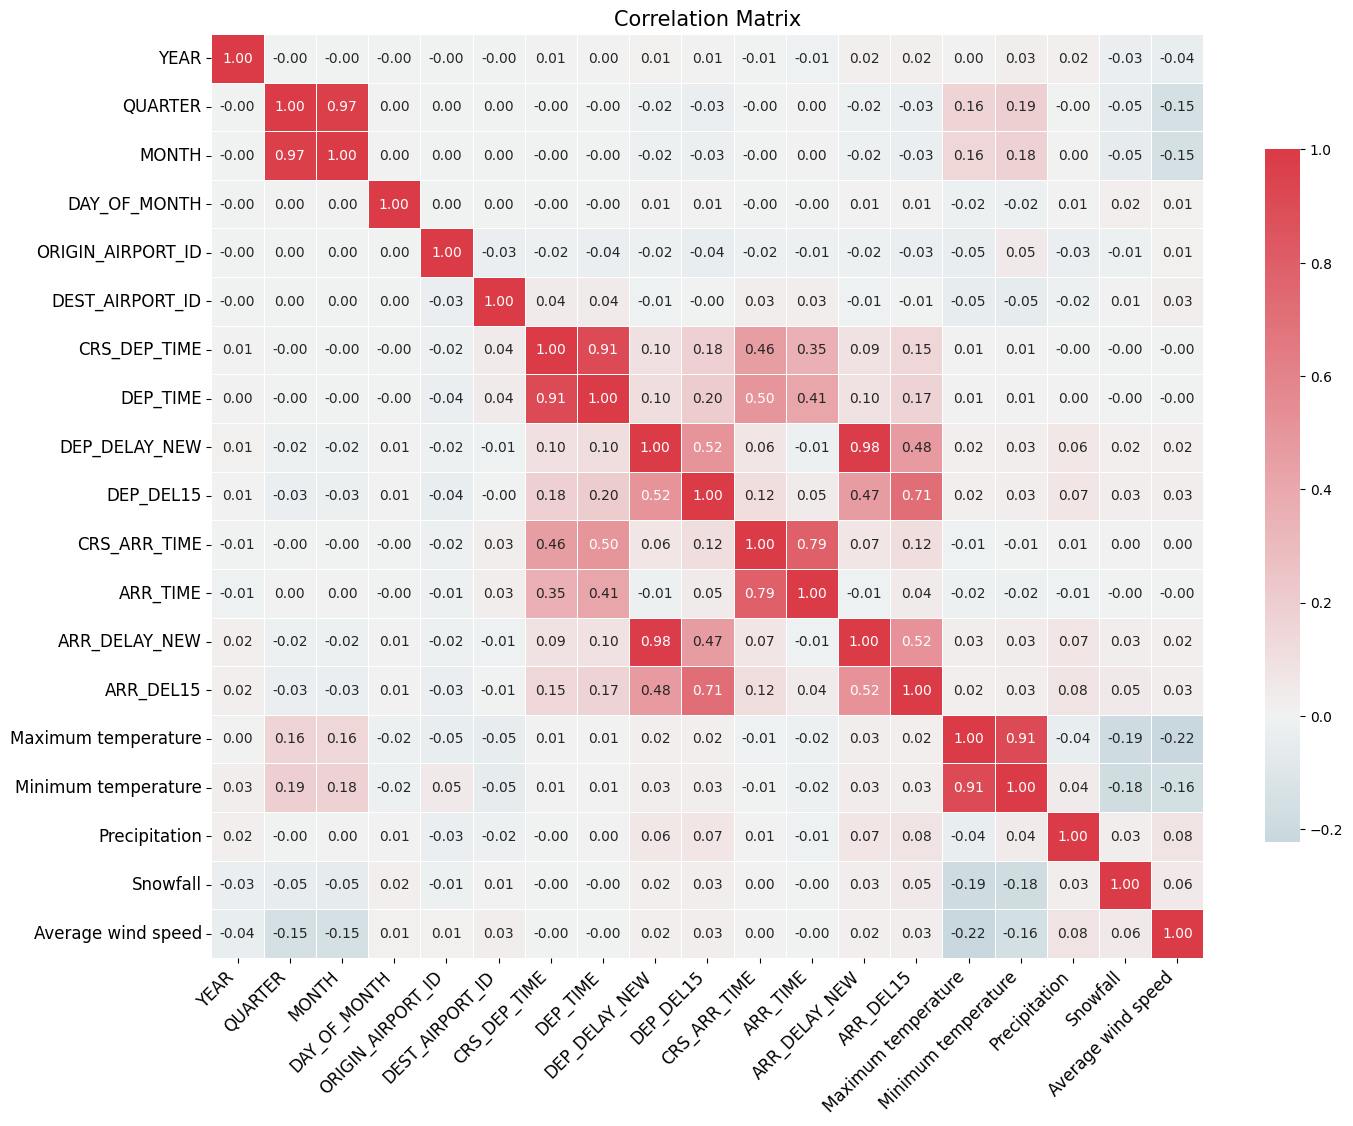

In [20]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = numeric_df.corr()

# colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=cmap, linewidths=0.5, center=0,
            cbar_kws={"shrink": 0.75}, annot_kws={"size": 10})

# Rotate the x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.title('Correlation Matrix', fontsize=15)
plt.show()

**Identify outliers in the delay times using box plots**

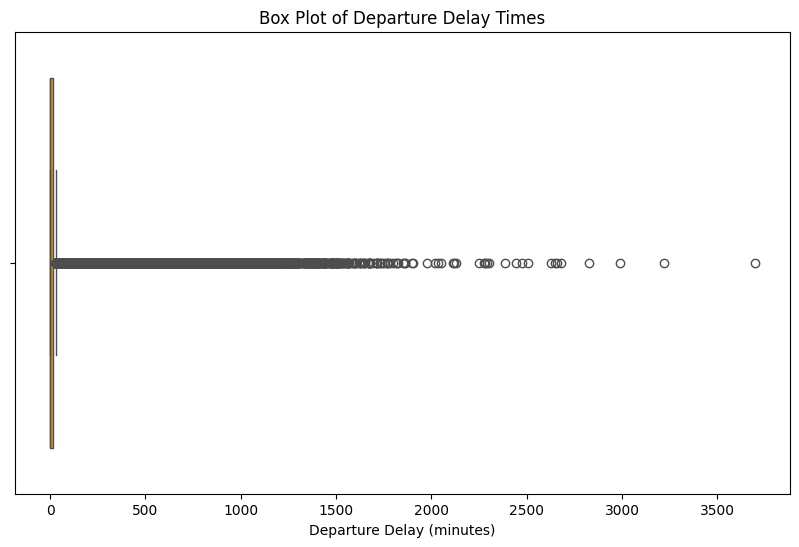

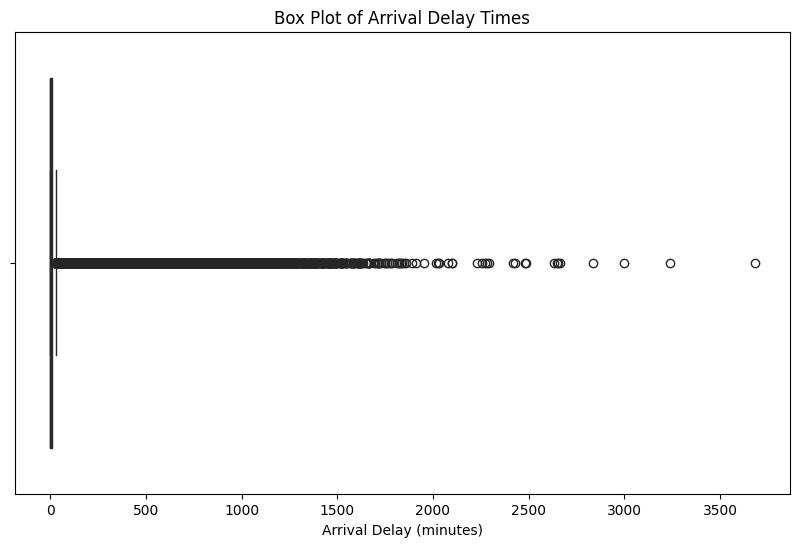

In [12]:
# Box plot for departure delay times
plt.figure(figsize=(10, 6))
sns.boxplot(x='DEP_DELAY_NEW', data=df, color='orange')
plt.title('Box Plot of Departure Delay Times')
plt.xlabel('Departure Delay (minutes)')
plt.show()

# Box plot for arrival delay times
plt.figure(figsize=(10, 6))
sns.boxplot(x='ARR_DELAY_NEW', data=df, color='purple')
plt.title('Box Plot of Arrival Delay Times')
plt.xlabel('Arrival Delay (minutes)')
plt.show()

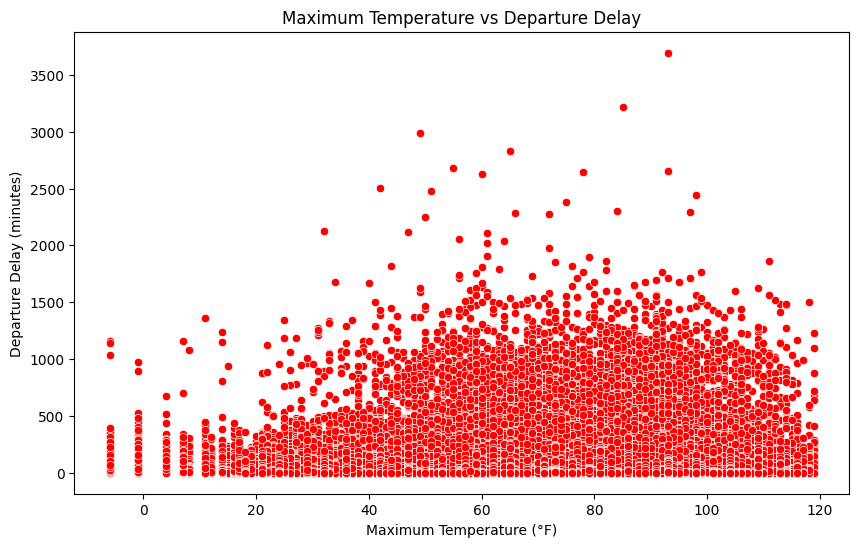

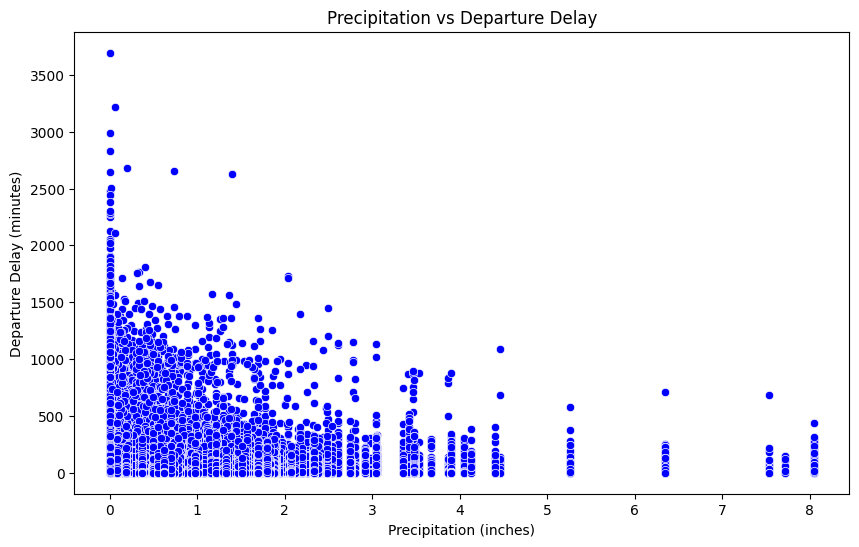

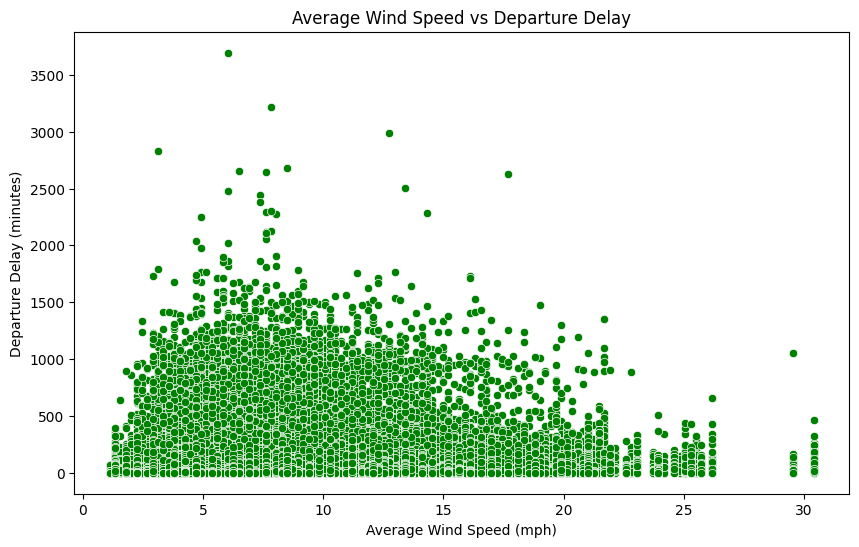

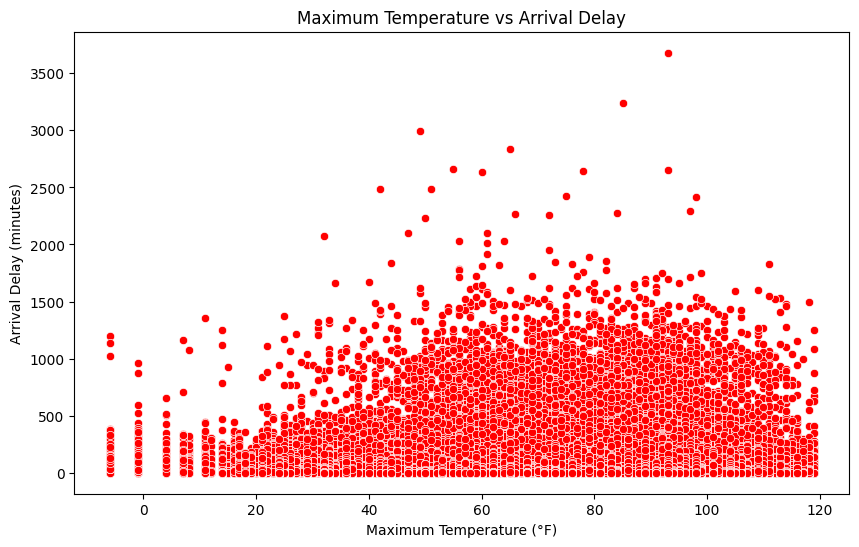

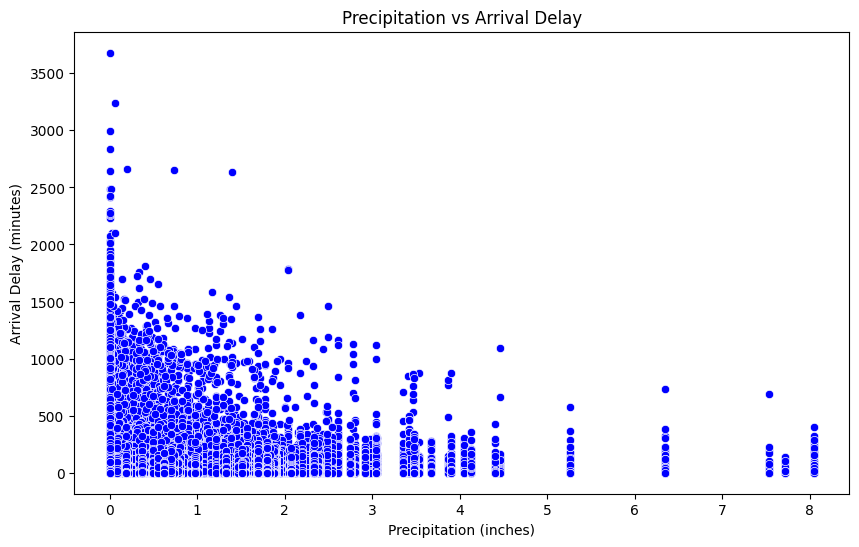

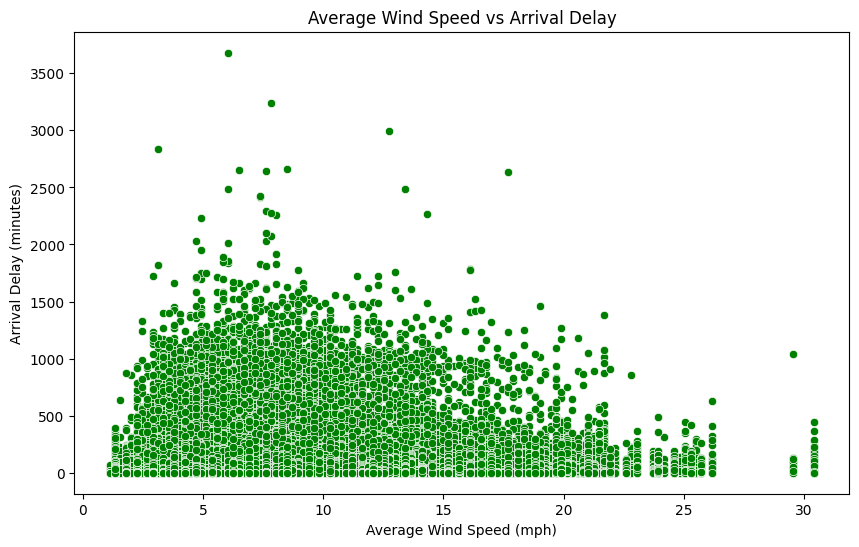

In [13]:
# Scatter plots for weather variables vs delay times
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Maximum temperature', y='DEP_DELAY_NEW', data=df, color='red')
plt.title('Maximum Temperature vs Departure Delay')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precipitation', y='DEP_DELAY_NEW', data=df, color='blue')
plt.title('Precipitation vs Departure Delay')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average wind speed', y='DEP_DELAY_NEW', data=df, color='green')
plt.title('Average Wind Speed vs Departure Delay')
plt.xlabel('Average Wind Speed (mph)')
plt.ylabel('Departure Delay (minutes)')
plt.show()

# Similar scatter plots for Arrival Delay
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Maximum temperature', y='ARR_DELAY_NEW', data=df, color='red')
plt.title('Maximum Temperature vs Arrival Delay')
plt.xlabel('Maximum Temperature (°F)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Precipitation', y='ARR_DELAY_NEW', data=df, color='blue')
plt.title('Precipitation vs Arrival Delay')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Average wind speed', y='ARR_DELAY_NEW', data=df, color='green')
plt.title('Average Wind Speed vs Arrival Delay')
plt.xlabel('Average Wind Speed (mph)')
plt.ylabel('Arrival Delay (minutes)')
plt.show()


<ipython-input-16-2cc5354f9b53>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=arrival_delay_counts.index, y=arrival_delay_counts.values, palette=['green', 'red'])
<ipython-input-16-2cc5354f9b53>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departure_delay_counts.index, y=departure_delay_counts.values, palette=['green', 'red'])


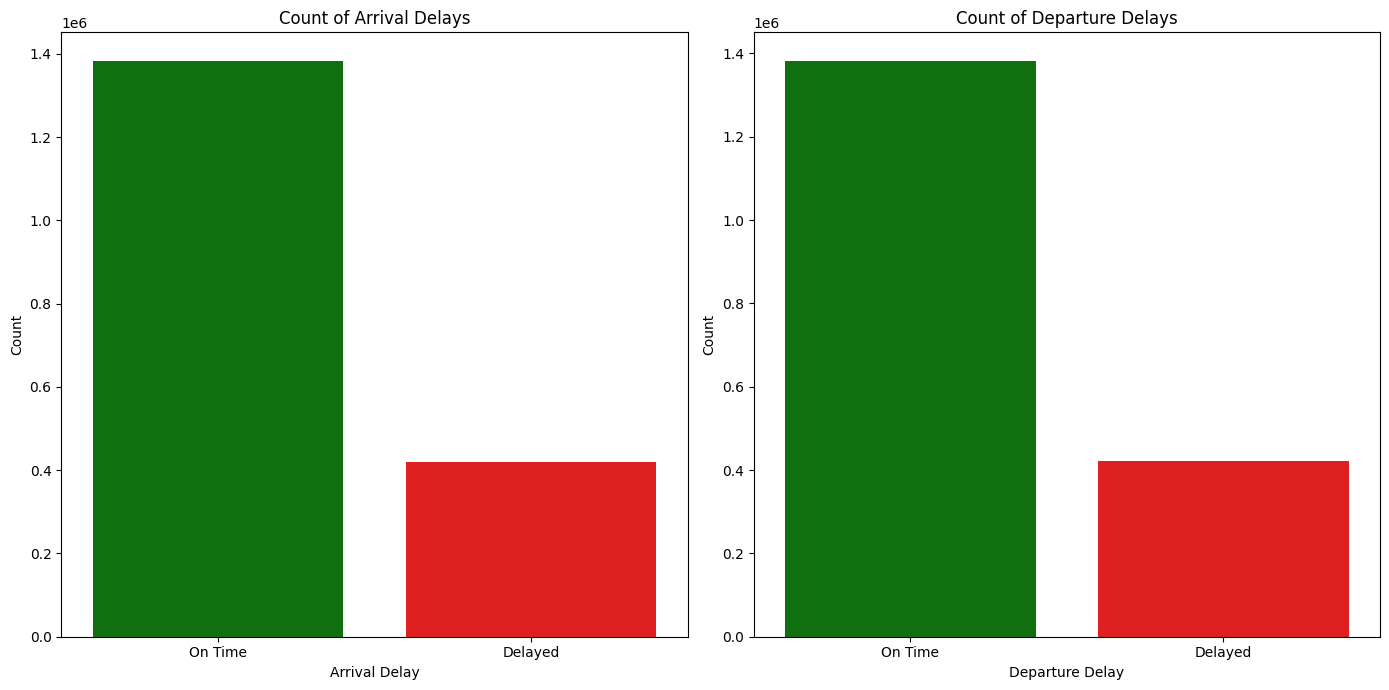

In [16]:
# Ensure 'ARR_DEL15' and 'DEP_DEL15' are numeric (0 or 1)
df['ARR_DEL15'] = pd.to_numeric(df['ARR_DEL15'], errors='coerce')
df['DEP_DEL15'] = pd.to_numeric(df['DEP_DEL15'], errors='coerce')

#counts for arrivals and departures
arrival_delay_counts = df['ARR_DEL15'].value_counts()
departure_delay_counts = df['DEP_DEL15'].value_counts()

# Set up the figure and axes
plt.figure(figsize=(14, 7))

# Bar chart for Arrival Delays
plt.subplot(1, 2, 1)
sns.barplot(x=arrival_delay_counts.index, y=arrival_delay_counts.values, palette=['green', 'red'])
plt.title('Count of Arrival Delays')
plt.xlabel('Arrival Delay')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['On Time', 'Delayed'])

# Bar chart for Departure Delays
plt.subplot(1, 2, 2)
sns.barplot(x=departure_delay_counts.index, y=departure_delay_counts.values, palette=['green', 'red'])
plt.title('Count of Departure Delays')
plt.xlabel('Departure Delay')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['On Time', 'Delayed'])


plt.tight_layout()
plt.show()